# Introduction to Geospatial Data

In [5]:
% matplotlib inline
import pandas as pd
import geopandas as gp

## Importing the data
Geospatial data is used to indicate information related to locations using longitude and latitude coordinates. It is available in form of vector or raster data from GIS file formats or data stores like ESRI shapefiles, GeoJSON files, geopackage files, PostGIS (PostgreSQL) database. We can read the data using the Geopandas library (this runs fiona under the hood; an interface to [GDAL](https://gdal.org)/OGR). Here is how to read and inspect a file, namely shapefile with [all the countries of the world](http://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/):

In [27]:
countries = gp.read_file("data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

In [9]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,NaN,NaN,Unrecognized,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

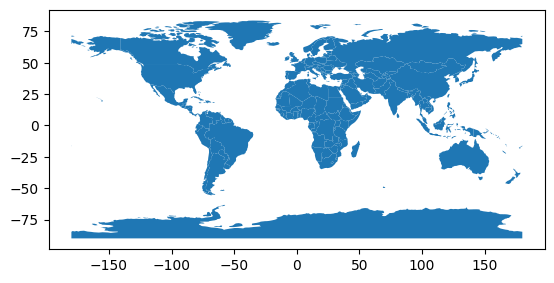

In [10]:
countries.plot()

In [11]:
type(countries)

geopandas.geodataframe.GeoDataFrame

## What are geospatial dataframes?
A GeoDataFrame contains a tabular, geospatial dataset: a 'geometry' column that holds the geometry information (or features in GeoJSON) and other columns with attributes (or properties in GeoJSON) that describe each of the geometries. It is similar to pandas dataframes as it allows to perform typical tabular data analysis but is extended with additional functionalities for geospatial data (area, distance, buffer, intersection etc).

In [12]:
countries.geometry

0      MULTIPOLYGON (((180.00000 -16.06713, 180.00000...
1      POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84000 49.00000, -122.9742...
4      MULTIPOLYGON (((-122.84000 49.00000, -120.0000...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.07070 42.58863, 19.80161 42.50009...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68000 10.76000, -61.10500 10.890...
176    POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...
Name: geometry, Length: 177, dtype: geometry

In [32]:
countries.columns = map(str.lower, countries.columns)
countries['pop_est'].mean()

43243457.74745763

<Axes: >

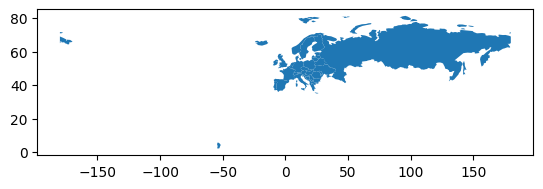

In [34]:
europe = countries[countries['continent'] == 'Europe']
europe.plot()

We have seen up until now that the individual objects in the geometry column are polygons. Other types of geometry objects are points e.g. world [map of cities](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/) and lines e.g. world [map of rivers](http://www.naturalearthdata.com/downloads/50m-physical-vectors/50m-rivers-lake-centerlines/).

In [35]:
cities = gp.read_file("data/ne_110m_populated_places/ne_110m_populated_places.shp")
rivers = gp.read_file("data/ne_50m_rivers_lake_centerlines/ne_50m_rivers_lake_centerlines.shp")

In [37]:
print(
    f"Object types for countries are {type(countries.geometry[2])}, cities {type(cities.geometry[0])} and rivers {type(rivers.geometry[0])}")

Object types for countries are <class 'shapely.geometry.polygon.Polygon'>, cities <class 'shapely.geometry.point.Point'> and rivers <class 'shapely.geometry.linestring.LineString'>


## The `Shapely` Library
The individual geometrical shapes are provided by the `shapely` library and we are able to construct them ourselves.

In [40]:
from shapely.geometry import Point, Polygon, LineString

point = Point(0, 0)
polygon = Polygon([(1, 1), (2,2), (2, 1)])
line = LineString([(0, 0, 0), (0, 0, 1)])
print(f"The area of the polygon is {polygon.area} and the distance from the point is {polygon.distance(point)}.")

The area of the polygon is 0.5 and the distance from the point is 1.4142135623730951.
